# How to use the functions related to the MGF in the repository in the right way?

First, it's important to import some of the modules that have been built.

In [1]:
from src.utils import *
from src.mgf_tools.mgf_readers import *
from src.mgf_tools.mgf_checks import *
from src.mgf_tools.mgf_get import * 
from src.mgf_tools.mgf_plots import *

Then add the path of the **.mgf** file. You can also check that there are no errors with the path.

In [2]:
mgf_data = r"/Users/carla/PycharmProjects/Mestrado/Transformer-Based-Models-for-Chemical-Fingerprint-Prediction/datasets/raw/cleaned_gnps_library.mgf"

path_check(mgf_data)

File found!


Then, to ensure that the iteration is taking place correctly over the spectra, you can use the information reading functions:

- validate_mgf_structure
- mgf_read_headers
- mgf_read_all

In [3]:
validate_mgf_structure(mgf_data)

In [ ]:
mgf_read_headers(mgf_data=mgf_data)

In [5]:
mgf_read_all(mgf_data=mgf_data, num_spectra=1)

And check if any of the spectra does not have a **valid ID**.

In [6]:
check_spectrum_ids(mgf_data)

After the above checks, you can collect information on each spectrum with the function, **mgf_get_spectra**.

In [3]:
mgf_spect= mgf_get_spectra(mgf_data, num_spectra=3)

Once the data has been collected, it is also important to check the format of the data in the output. 

If it's more than 1 spectrum, it must be a dictionary. If it's only 1 spectrum, it should be a list.

In [4]:
type(mgf_spect)

list

After loading the data, we can do a little exploratory analysis of the data and metadata in the file.

First you can check the number of compounds and type of ionisation modes using **check_mgf_data**. It is also important to check whether the number of compounds matches the number of spectra found by the **validate_mgf_structure** function.

In [8]:
check_mgf_data(mgf_spect)

You can also see the distribution of spectra by compound using **plot_spectra_distribution**.

In [9]:
plot_spectra_distribution(spectra=mgf_spect, top_percent=95)

And some information about m/z and the number of peaks in the spectra using **check_mgf_spectra**.

In [4]:
check_mgf_spectra(mgf_spect, percentile=95)

{'m/z range': (0.0008, 4971.122559),
 'peak count stats': {'min': 1,
  'max': 10000,
  'mean': 99.09948496710906,
  'median': 14.0,
  'percentile': {'25%': 5.0,
   '75%': 52.0,
   '90%': 206.0,
   '95%': 431.0,
   '99%': 1338.719999999972,
   '95': 431.0}}}

After the exploratory analysis, you can plot the spectra.

If the data collected is a dictionary (1 spectrum), you should use the function **plot_spectrum** to visualize it.

In [5]:
plot_spectrum(mgf_spect)

TypeError: Spectrum must be a dictionary

If the data collected is a list (more than 1 spectrum), you should use the function **plot_spectra** to visualize it.

Plotting Spectra:   0%|          | 0/3 [00:00<?, ?spectrum/s]

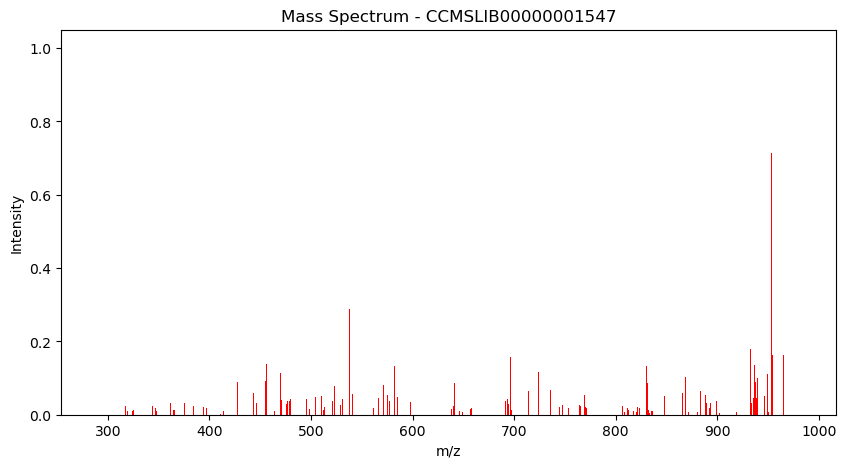

Plotting Spectra:  33%|███▎      | 1/3 [00:00<00:00,  4.01spectrum/s]

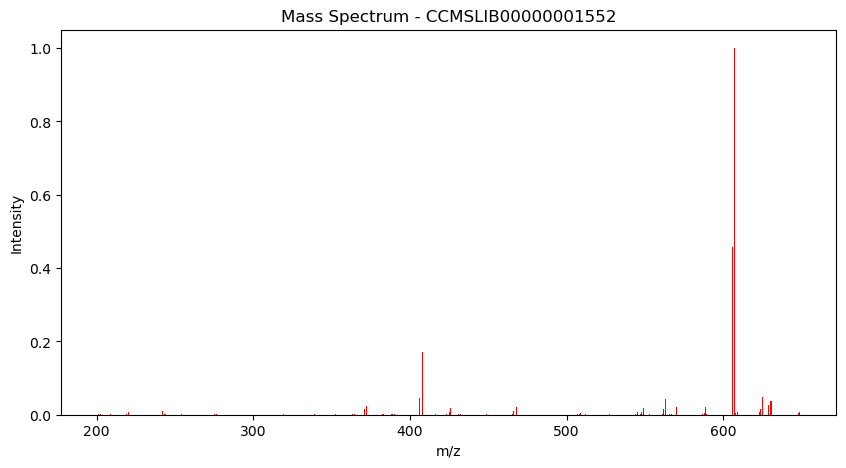

Plotting Spectra:  67%|██████▋   | 2/3 [00:00<00:00,  5.79spectrum/s]

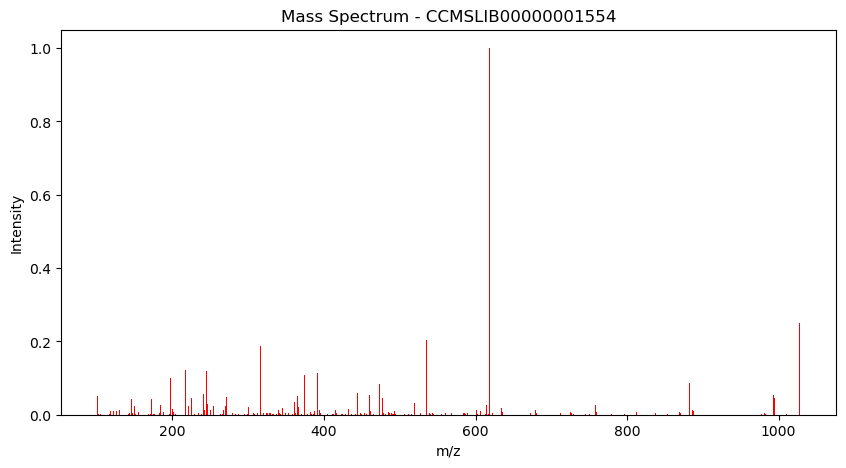

Plotting Spectra: 100%|██████████| 3/3 [00:00<00:00,  4.50spectrum/s]


In [4]:
plot_spectra(mgf_spect)

In addition, it is possible to isolate and obtain the SMILES of the molecules within the .mgf file.

In [3]:
data = mgf_get_smiles(mgf_data, num_spectra=25)